## <b> ------------------------------------Classification Vehicle Loan Default Prediction---------------------------

#### Link to the dataset : https://www.kaggle.com/sneharshinde/ltfs-av-data
#### Problem Statement : Whether the customer  will default for paying the EMI. (0 - Yes, 1 - No)
#### We are truncating the dataset to 5000 rows as there are total of almost 230000 rows and processing takes time.

#### The Dataset has following attributes. The names and description are given as follows:

| Column Name | Description  |
|------|------|
|   UniqueID  | Customer ID|
|   disbursed_amount  |  Loan Amount disbursed|
|   asset_cost  | cost of the asset|
|   ltv  | loan to value ratio|
|   branch_id  |  ID of the branch where loan was disbursed|
|   supplier_id  | vehicle dealer ID|
|   manufacturer_id  | ID of vehicle manufacturer|
|   Current_pincode_ID  | Customer pincode|
|   Date.of.Birth  | Customer Date of Birth|
|   Employment.Type  | Whether the Customer is Salaried, Self Employed or Unemployed|
|   DisbursalDate  |  Date of Disbursement|
|   State_ID  | State where the Customer lives in|
|   Employee_code_ID  | ID of the Employee of the organization |
|   MobileNo_Avl_Flag  |  Whether the Employee has Mobile Phone or not|
|   Aadhar_flag  | Whether the Employee has Aadhar card or not|
|   PAN_flag  | Whether the Employee has PAN card or not|
|   VoterID_flag  |  Whether the Employee has Voter ID card or not|
|   Driving_flag  | Whether the Employee has Driving License card or not|
|   Passport_flag  | Whether the Employee has Passport or not|
|   PERFORM_CNS.SCORE  | Bureau Score|
|   PERFORM_CNS.SCORE.DESCRIPTION  | Bureau Score|
|   PRI.NO.OF.ACCTS  | counts of total primary accounts of the customer|
|   PRI.ACTIVE.ACCTS  |  Primary active account|
|   PRI.OVERDUE.ACCTS  | count of primary default account at the time of disbursement|
|   PRI.CURRENT.BALANCE  | Balance in the primary account at the time of loan disbursal|
|   PRI.SANCTIONED.AMOUNT  | Total amount sanctioned for all the loans with respect to primary account|
|   PRI.DISBURSED.AMOUNT  |  Total amount dsibursed off primary account|
|   SEC.NO.OF.ACCTS  | Counts of secondary acounts of the customer |
|   SEC.ACTIVE.ACCTS  | Secondary active Account |
|   SEC.OVERDUE.ACCTS  |  count of secondary default account at the time of disbursement|
|   SEC.CURRENT.BALANCE  | Balance in the secondary account at the time of loan disbursal|
|   SEC.SANCTIONED.AMOUNT  | Total amount sanctioned for all the loans with respect to secondary account |
|   SEC.DISBURSED.AMOUNT  |  Total amount dsibursed off secondary account|
|   PRIMARY.INSTAL.AMT  | EMI of primary loan|
|   SEC.INSTAL.AMT  | EMI of secondary loan|
|   NEW.ACCTS.IN.LAST.SIX.MONTHS  | new loans taken by the customer before disbursement|
|   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  | loans defaulted in last 6 months|
|   AVERAGE.ACCT.AGE  | Average loan tenure|
|   CREDIT.HISTORY.LENGTH  |  Time since first loan|
|   NO.OF_INQUIRIES  | Enquiries done by the customer for loan|
|   loan_default  | Whether the loan has been paid (target value : 0 - yes , 1 - no)|


In [1]:
#Import basic libraries
import random
import pandas as pd 
import numpy as np
from sklearn.utils import shuffle
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read Dataset
data = pd.read_csv('train.csv')
data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [3]:
data.shape

(233154, 41)

In [4]:
#Here we are replacing the blank values in Employment.Type column of dataset with umemployed 
data["Employment.Type"].fillna("Unemployed", inplace = True) 

In [5]:
#Since the values of 0 are dominating, we take equal proportion of 0 and 1 from dataset for better predictions. 
#We could have used SMOTE technique for overpopulating the dataset but since the data was aviable we chose to take that.
bank1= data[data['loan_default'] == 1]
df1 = bank1.iloc[0:2500, :]
bank2 = data[data['loan_default'] == 0]
df2 = bank2.iloc[0:2500, :]
target = pd.concat([df1, df2])

In [6]:
target.shape

(5000, 41)

In [7]:
#Gives the counter of zero and one for loan_default
from collections import Counter
counter = Counter(target['loan_default'])
print(counter)

Counter({1: 2500, 0: 2500})


In [8]:
target

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
10,548567,53278,61230,89.83,67,22807,45,1493,01-01-79,Self employed,...,0,0,2270,0,0,0,0yrs 7mon,0yrs 7mon,0,1
12,478647,53278,61330,89.68,67,22807,45,1497,01-06-74,Salaried,...,0,0,3300,0,0,0,1yrs 3mon,2yrs 9mon,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,502616,60147,93494,66.31,36,22412,48,6610,01-03-84,Self employed,...,0,0,0,0,1,2,2yrs 1mon,5yrs 8mon,0,0
3130,462929,52313,94910,57.42,36,23697,120,6614,01-01-93,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3131,628495,51978,76933,69.80,36,18461,45,6604,01-01-95,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3132,624498,41410,81544,52.73,36,22412,48,6619,01-01-72,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [9]:
#shuffle the dataset
project = shuffle(target, random_state = 0)
train = project.reset_index(drop=True)
train

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,568117,49303,57650,87.60,79,23849,86,750,21-08-96,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
1,470278,51778,60058,89.41,63,16309,45,7089,11-02-99,Unemployed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
2,548904,54275,73954,76.94,36,20289,86,6537,01-03-67,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,0
3,564463,58947,70397,86.08,142,17315,86,72,07-02-85,Salaried,...,0,0,0,0,0,0,3yrs 8mon,7yrs 7mon,0,0
4,625329,53513,91281,60.47,36,22412,48,6588,01-01-92,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,439262,34841,68316,53.72,36,18461,45,6612,01-01-91,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
4996,646119,53803,70764,77.02,20,22882,86,6183,04-06-67,Self employed,...,0,0,13445,0,1,1,1yrs 3mon,3yrs 4mon,1,0
4997,562560,63152,109783,61.94,7,21032,49,5740,21-05-85,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1
4998,632900,52303,68695,77.15,34,15196,86,998,29-05-93,Self employed,...,0,0,0,0,0,0,0yrs 6mon,0yrs 6mon,0,0


In [10]:
#Separating the target value from the original dataset
X = train.drop('loan_default', axis = 1)
y = train['loan_default']

In [11]:
#Checking for null values in the dataset
X.isna().sum()

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALA

Text(0.5, 1.0, 'CNS Descrpitption')

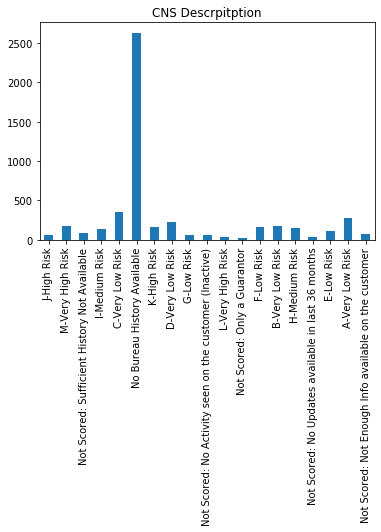

In [12]:
#Bar plot for PERFORM_CNS.SCORE.DESCRIPTION column
(X['PERFORM_CNS.SCORE.DESCRIPTION']
 .value_counts(sort=False)
 .plot.bar()
 .set_title('CNS Descrpitption')
)

Text(0.5, 1.0, 'Employment_Type')

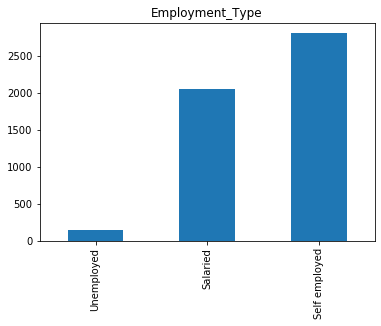

In [13]:
#Bar plot for Employment Type
(X['Employment.Type']
 .value_counts(sort=False)
 .plot.bar()
 .set_title('Employment_Type')
)

Text(0.5, 1.0, 'branch_id')

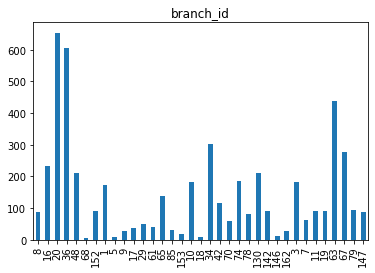

In [14]:
#Bar plot for branch_id column
(X['branch_id']
 .value_counts(sort=False)
 .plot.bar()
 .set_title('branch_id')
)

In [15]:
#Checking for unique values in each column
X.nunique()

UniqueID                               5000
disbursed_amount                       1994
asset_cost                             3175
ltv                                    2551
branch_id                                35
supplier_id                             378
manufacturer_id                           8
Current_pincode_ID                      998
Date.of.Birth                          2950
Employment.Type                           3
DisbursalDate                            83
State_ID                                 15
Employee_code_ID                        118
MobileNo_Avl_Flag                         1
Aadhar_flag                               2
PAN_flag                                  2
VoterID_flag                              2
Driving_flag                              2
Passport_flag                             2
PERFORM_CNS.SCORE                       380
PERFORM_CNS.SCORE.DESCRIPTION            19
PRI.NO.OF.ACCTS                          40
PRI.ACTIVE.ACCTS                

In [16]:
# Here we are inserting nan values in almost 8% of data randomly
ix = [(row, col) for row in range(X.shape[0]) for col in range(X.shape[1])]
for row, col in random.sample(ix, int(round(.08*len(ix)))):
    X.iloc[row, col] = np.nan

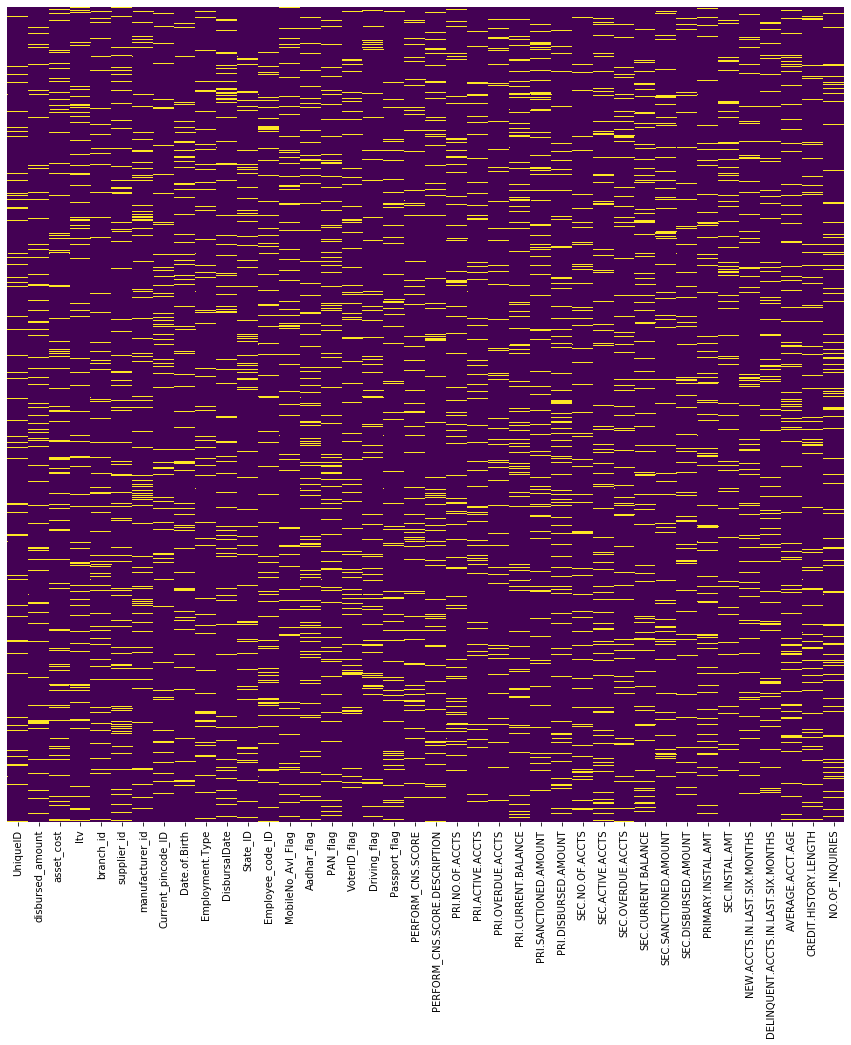

In [17]:
#Heatmap displays the distributition of null values
plt.figure(figsize=(15,15))
sns.heatmap(X.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
#Checking for null values across columns
X.isna().sum()

UniqueID                               397
disbursed_amount                       398
asset_cost                             389
ltv                                    421
branch_id                              400
supplier_id                            407
manufacturer_id                        388
Current_pincode_ID                     394
Date.of.Birth                          399
Employment.Type                        419
DisbursalDate                          393
State_ID                               371
Employee_code_ID                       388
MobileNo_Avl_Flag                      406
Aadhar_flag                            414
PAN_flag                               414
VoterID_flag                           420
Driving_flag                           384
Passport_flag                          376
PERFORM_CNS.SCORE                      372
PERFORM_CNS.SCORE.DESCRIPTION          391
PRI.NO.OF.ACCTS                        399
PRI.ACTIVE.ACCTS                       373
PRI.OVERDUE

#### Here we are preprocessing the data. This includes imputing the null value, one hot evctor encoding  and mapping the data. This is done to make the calculations easier.

In [19]:
#Here we are dropping the columns which we think will not contribute much.
#The PERFORM_CNS.SCORE is dropped as there is a column giving the description of the same 
X = X.drop( columns = ['UniqueID', 'Current_pincode_ID',
                       'Employee_code_ID', 
                       'DisbursalDate', 
                       'PERFORM_CNS.SCORE', 
                       'MobileNo_Avl_Flag'])

In [20]:
X['Employment.Type'].value_counts()

Self employed    2562
Salaried         1889
Unemployed        130
Name: Employment.Type, dtype: int64

In [21]:
#Here we are imputing the nan values in Employment.Type column with random values already existing in the table
#We are randomly imputing blank values with 'Self Employed', 'Salaried' or 'Unemployed'
#We are using backward fill method for the same.

X['Employment.Type'].fillna( method ='bfill',  inplace = True) 

In [22]:
X['Employment.Type'].value_counts()

Self employed    2792
Salaried         2059
Unemployed        149
Name: Employment.Type, dtype: int64

In [23]:
#Herw we are imputing the null in columns disbursed_amount, asset_cost and ltv
X.disbursed_amount.fillna(X.groupby('Employment.Type').disbursed_amount.transform(np.mean), inplace=True)
X.asset_cost.fillna(X.groupby('Employment.Type').asset_cost.transform(np.mean), inplace=True)
X.ltv.fillna(X.groupby('Employment.Type').ltv.transform(np.mean), inplace=True)

In [24]:
#Herw we are imputing the null in columns PRI.DISBURSED.AMOUNT,PRI.SANCTIONED.AMOUNT, PRI.CURRENT.BALANCE and PRIMARY.INSTAL.AMT
X['PRI.DISBURSED.AMOUNT'] = X['PRI.DISBURSED.AMOUNT'].fillna(X['PRI.DISBURSED.AMOUNT'].mean())
X['PRI.SANCTIONED.AMOUNT'] = X['PRI.SANCTIONED.AMOUNT'].fillna(X['PRI.SANCTIONED.AMOUNT'].mean())
X['PRI.CURRENT.BALANCE'] = X['PRI.CURRENT.BALANCE'].fillna(X['PRI.CURRENT.BALANCE'].mean())
X['PRIMARY.INSTAL.AMT'] = X['PRIMARY.INSTAL.AMT'].fillna(X['PRIMARY.INSTAL.AMT'].mean())

In [25]:
#For null imputation in above and below steps, we have used mean as well as median for the same.
#Median imputation is used for those columns which cannot take float values such as PRI.NO.OF.ACCTS.
#Mean imputation is used for the rest columns which can take float values
X['PRI.NO.OF.ACCTS'] = X['PRI.NO.OF.ACCTS'].fillna(X['PRI.NO.OF.ACCTS'].median())
X['PRI.ACTIVE.ACCTS'] = X['PRI.ACTIVE.ACCTS'].fillna(X['PRI.ACTIVE.ACCTS'].median())
X['PRI.OVERDUE.ACCTS'] = X['PRI.OVERDUE.ACCTS'].fillna(X['PRI.OVERDUE.ACCTS'].median())
X['SEC.ACTIVE.ACCTS'] = X['SEC.ACTIVE.ACCTS'].fillna(X['SEC.ACTIVE.ACCTS'].median())
X['NEW.ACCTS.IN.LAST.SIX.MONTHS'] = X['NEW.ACCTS.IN.LAST.SIX.MONTHS'].fillna(X['NEW.ACCTS.IN.LAST.SIX.MONTHS'].median())
X['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'] = X['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].fillna(X['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].median())

In [26]:
X['branch_id'] = X['branch_id'].fillna(X['branch_id'].median())
X['supplier_id'] = X['supplier_id'].fillna(X['supplier_id'].median())
X['manufacturer_id'] = X['manufacturer_id'].fillna(X['manufacturer_id'].median())
X['State_ID'] = X['State_ID'].fillna(X['State_ID'].median())
X['SEC.NO.OF.ACCTS'] = X['SEC.NO.OF.ACCTS'].fillna(X['SEC.NO.OF.ACCTS'].median())
X['SEC.OVERDUE.ACCTS'] = X['SEC.OVERDUE.ACCTS'].fillna(X['SEC.OVERDUE.ACCTS'].median())
X['SEC.CURRENT.BALANCE'] = X['SEC.CURRENT.BALANCE'].fillna(X['SEC.CURRENT.BALANCE'].mean())
X['SEC.SANCTIONED.AMOUNT'] = X['SEC.SANCTIONED.AMOUNT'].fillna(X['SEC.SANCTIONED.AMOUNT'].mean())
X['SEC.DISBURSED.AMOUNT'] = X['SEC.DISBURSED.AMOUNT'].fillna(X['SEC.DISBURSED.AMOUNT'].mean())
X['SEC.INSTAL.AMT'] = X['SEC.INSTAL.AMT'].fillna(X['SEC.INSTAL.AMT'].mean())
X['NO.OF_INQUIRIES'] = X['NO.OF_INQUIRIES'].fillna(X['NO.OF_INQUIRIES'].median())

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 34 columns):
disbursed_amount                       5000 non-null float64
asset_cost                             5000 non-null float64
ltv                                    5000 non-null float64
branch_id                              5000 non-null float64
supplier_id                            5000 non-null float64
manufacturer_id                        5000 non-null float64
Date.of.Birth                          4601 non-null object
Employment.Type                        5000 non-null object
State_ID                               5000 non-null float64
Aadhar_flag                            4586 non-null float64
PAN_flag                               4586 non-null float64
VoterID_flag                           4580 non-null float64
Driving_flag                           4616 non-null float64
Passport_flag                          4624 non-null float64
PERFORM_CNS.SCORE.DESCRIPTION          46

In [28]:
#Here we are imputing Date of Birth by just year for easier calculations
X['Birth_year'] = pd.DatetimeIndex(X['Date.of.Birth']).year
X.drop(['Date.of.Birth'],axis=1,inplace= True)

In [29]:
#Imputing missing values in Birth year by using Median imputation
X['Birth_year'] = X['Birth_year'].fillna(X['Birth_year'].median())

In [30]:
#We have combined all the ID columns into a single column called as ID_flag which tells you whether ID exists or not
X['ID_flag'] = X['Aadhar_flag'].combine_first(X['PAN_flag'])
X['ID_flag'] = X['ID_flag'].combine_first(X['VoterID_flag'])
X['ID_flag'] = X['ID_flag'].combine_first(X['Driving_flag'])
X['ID_flag'] = X['ID_flag'].combine_first(X['Passport_flag'])

In [31]:
#Creating dummies for Employment.Type column
Emp_type=pd.get_dummies(X['Employment.Type'],columns='Employment.Type',prefix='EmpType')
X=pd.concat([X, Emp_type], axis=1)

In [32]:
#Here we are converting the AVERAGE.ACCT.AGE and CREDIT.HISTORY.LENGTH from 'n1 yrs n2 mon' format to just months
#For example '1yrs 7 months' to '19 months' for easier calculations
X['AVERAGE.ACCT.AGE'] = (X['AVERAGE.ACCT.AGE'].str.extractall(r'(\d+)')[0].unstack().astype(int).set_axis(['yr', 'mon'], axis=1, inplace=False).eval('yr * 12 + mon'))

In [33]:
X['CREDIT.HISTORY.LENGTH'] = (X['CREDIT.HISTORY.LENGTH'].str.extractall(r'(\d+)')[0].unstack().astype(int).set_axis(['yr', 'mon'], axis=1, inplace=False).eval('yr * 12 + mon'))

In [34]:
#Imputing AVERAGE.ACCT.AGE and CREDIT.HISTORY.LENGTH with mean imputation
X['AVERAGE.ACCT.AGE'] = X['AVERAGE.ACCT.AGE'].fillna(X['AVERAGE.ACCT.AGE'].mean())
X['CREDIT.HISTORY.LENGTH'] = X['CREDIT.HISTORY.LENGTH'].fillna(X['CREDIT.HISTORY.LENGTH'].mean())

In [35]:
#Checking distinct categories for column PERFORM_CNS.SCORE.DESCRIPTION
X['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available                                2439
C-Very Low Risk                                             320
A-Very Low Risk                                             249
D-Very Low Risk                                             202
M-Very High Risk                                            170
B-Very Low Risk                                             158
K-High Risk                                                 151
F-Low Risk                                                  149
H-Medium Risk                                               133
I-Medium Risk                                               125
E-Low Risk                                                  105
Not Scored: Sufficient History Not Available                 82
Not Scored: Not Enough Info available on the customer        71
G-Low Risk                                                   59
J-High Risk                                                  58
Not Scored: No Activity seen on the cust

In [36]:
#Here we are combing the categories into one whole
#Ex A,B,C and D categories of Very Low Risk are combined as one and called VLow
X.replace(to_replace = ['No Bureau History Available'] , value = 'No History', inplace = True)
X.replace(to_replace = ['A-Very Low Risk', 'B-Very Low Risk', 'C-Very Low Risk', 'D-Very Low Risk'] , value = 'VLow' , inplace = True)
X.replace(to_replace = ['E-Low Risk', 'F-Low Risk', 'G-Low Risk'] , value = 'Low' , inplace = True)
X.replace(to_replace = ['H-Medium Risk', 'I-Medium Risk'] , value = 'Medium' , inplace = True)
X.replace(to_replace = ['J-High Risk', 'K-High Risk'] , value = 'High' , inplace = True)
X.replace(to_replace = ['L-Very High Risk', 'M-Very High Risk'] , value = 'VHigh' , inplace = True)
X.replace(to_replace = ['Not Scored: Not Enough Info available on the customer', 'Not Scored: Sufficient History Not Available', 'Not Scored: No Activity seen on the customer (Inactive)', 'Not Scored: No Updates available in last 36 months', 'Not Scored: Only a Guarantor','Not Scored: More than 50 active Accounts found'] , value = 'NotScored' , inplace = True)

In [37]:
#the count for combined categories
X['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No History    2439
VLow           929
Low            313
NotScored      263
Medium         258
High           209
VHigh          198
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64

In [38]:
#Here agian we are randomlyn imputing the null values in PERFORM_CNS.SCORE.DESCRIPTION with existing values in the column
X['PERFORM_CNS.SCORE.DESCRIPTION'].fillna( method ='bfill',  inplace = True) 

In [39]:
#Dropping the columns 
X.drop([ 'Employment.Type',
        'Aadhar_flag',
        'PAN_flag',
        'VoterID_flag',
        'Driving_flag', 
        'Passport_flag'],axis=1,inplace= True)

In [40]:
#Converting some columns to integer
X = X.astype({'ID_flag': 'int', 
              'branch_id': 'int',
              'supplier_id': 'int',
              'manufacturer_id': 'int',
              'State_ID': 'int',
              'PRI.NO.OF.ACCTS': 'int', 
              'PRI.ACTIVE.ACCTS': 'int', 
              'PRI.OVERDUE.ACCTS': 'int', 
              'SEC.NO.OF.ACCTS': 'int', 
              'SEC.ACTIVE.ACCTS': 'int', 
              'NEW.ACCTS.IN.LAST.SIX.MONTHS': 'int', 
              'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS': 'int', 
              'AVERAGE.ACCT.AGE': 'int', 
              'NO.OF_INQUIRIES': 'int', 
              'Birth_year': 'int',
              'Birth_year': 'int'})

In [41]:
#Creating dummies for PERFORM_CNS.SCORE.DESCRIPTION
CNS_Score=pd.get_dummies(X['PERFORM_CNS.SCORE.DESCRIPTION'],columns='PERFORM_CNS.SCORE.DESCRIPTION',prefix='CNS')
X=pd.concat([X, CNS_Score], axis=1)

In [42]:
#Dropping the column
X.drop([ 'PERFORM_CNS.SCORE.DESCRIPTION'],axis=1,inplace= True)

In [43]:
#Here you can see the final list of features obtained and all the null values have been imputed 
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 38 columns):
disbursed_amount                       5000 non-null float64
asset_cost                             5000 non-null float64
ltv                                    5000 non-null float64
branch_id                              5000 non-null int32
supplier_id                            5000 non-null int32
manufacturer_id                        5000 non-null int32
State_ID                               5000 non-null int32
PRI.NO.OF.ACCTS                        5000 non-null int32
PRI.ACTIVE.ACCTS                       5000 non-null int32
PRI.OVERDUE.ACCTS                      5000 non-null int32
PRI.CURRENT.BALANCE                    5000 non-null float64
PRI.SANCTIONED.AMOUNT                  5000 non-null float64
PRI.DISBURSED.AMOUNT                   5000 non-null float64
SEC.NO.OF.ACCTS                        5000 non-null int32
SEC.ACTIVE.ACCTS                       5000 non-null in

In [44]:
X.shape

(5000, 38)

### Heatmap for Correlation
### We can see that there is high correlation between some of the features

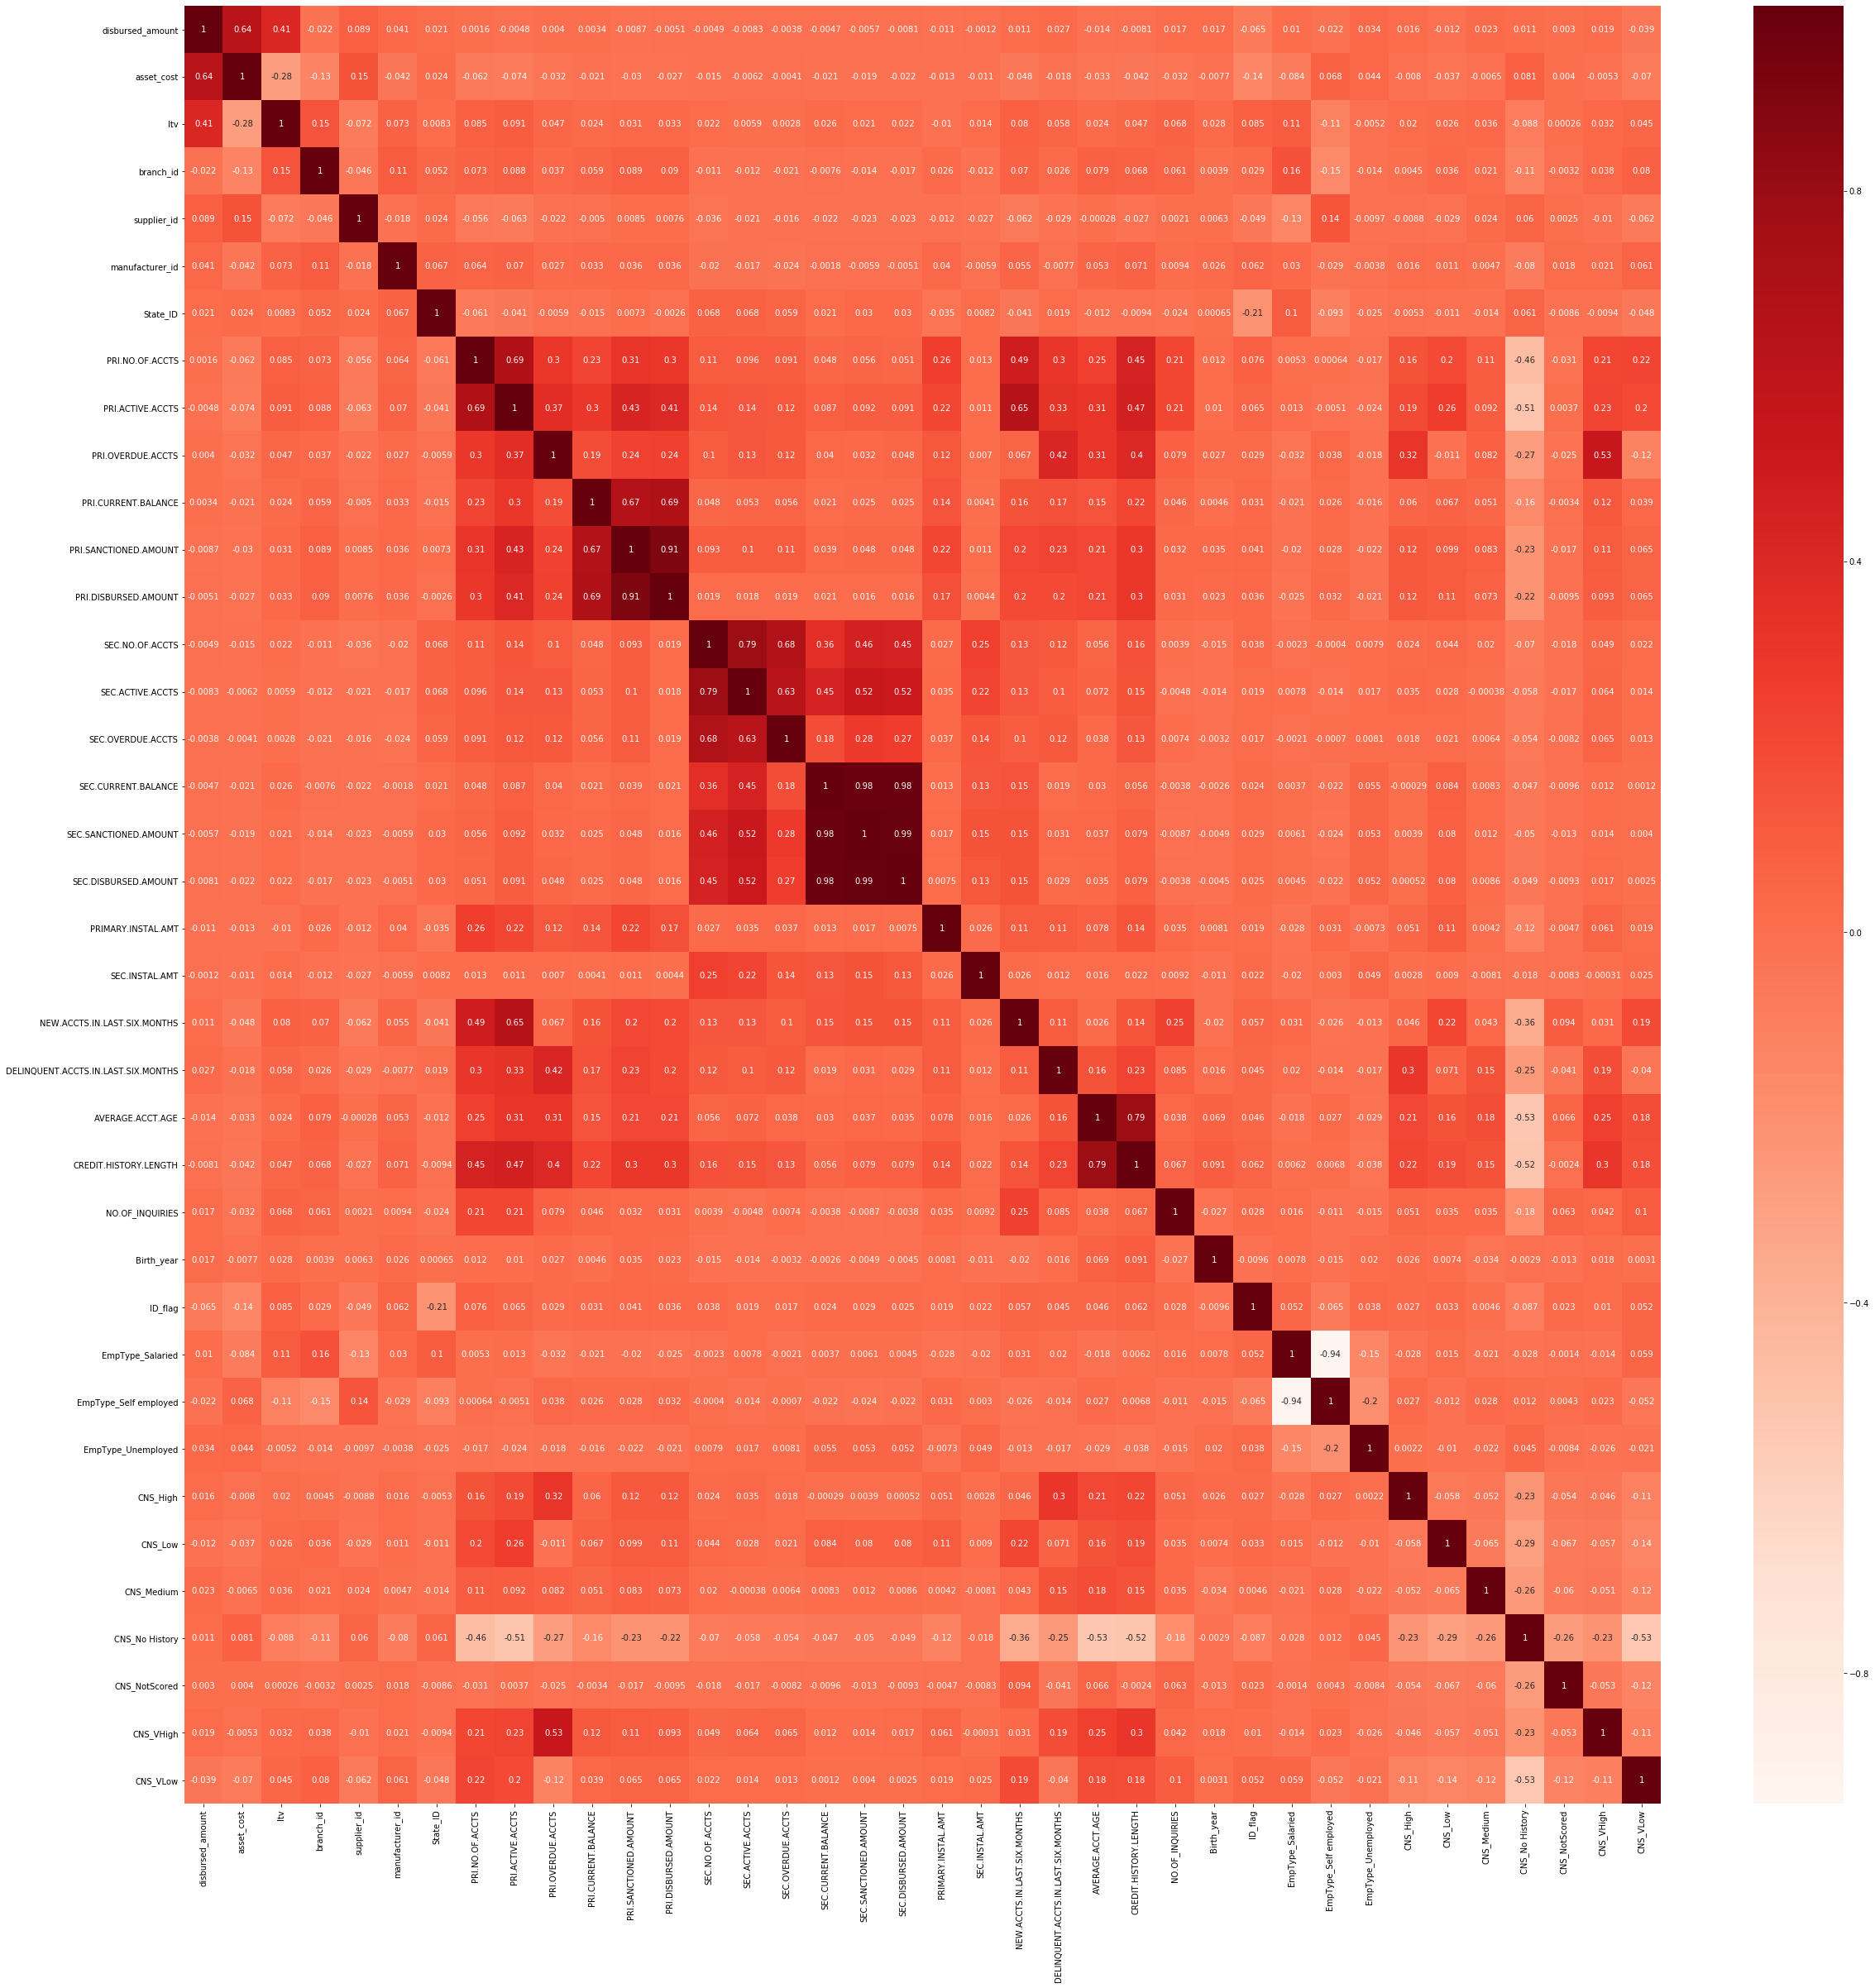

In [45]:
 plt.figure(figsize=(40,40))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 38 columns):
disbursed_amount                       5000 non-null float64
asset_cost                             5000 non-null float64
ltv                                    5000 non-null float64
branch_id                              5000 non-null int32
supplier_id                            5000 non-null int32
manufacturer_id                        5000 non-null int32
State_ID                               5000 non-null int32
PRI.NO.OF.ACCTS                        5000 non-null int32
PRI.ACTIVE.ACCTS                       5000 non-null int32
PRI.OVERDUE.ACCTS                      5000 non-null int32
PRI.CURRENT.BALANCE                    5000 non-null float64
PRI.SANCTIONED.AMOUNT                  5000 non-null float64
PRI.DISBURSED.AMOUNT                   5000 non-null float64
SEC.NO.OF.ACCTS                        5000 non-null int32
SEC.ACTIVE.ACCTS                       5000 non-null in

# Creating Train and Test

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [48]:
#Splitting into train and test
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

#### Scaling using Min-Max scalar as it produces values of range [0,1].

In [49]:
scaler = MinMaxScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [50]:
X_train

array([[0.31972052, 0.15513695, 0.79499679, ..., 0.        , 0.        ,
        1.        ],
       [0.46218061, 0.27144292, 0.80692752, ..., 0.        , 0.        ,
        1.        ],
       [0.37285553, 0.15767166, 0.72315939, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.18841649, 0.22567956, 0.40692752, ..., 0.        , 0.        ,
        1.        ],
       [0.37620302, 0.25038956, 0.83322643, ..., 0.        , 0.        ,
        0.        ],
       [0.14892944, 0.26266145, 0.27761386, ..., 0.        , 0.        ,
        0.        ]])

In [51]:
#Converting array to dataframe
X_train_df = pd.DataFrame(X_train, columns= X.columns)
X_test_df = pd.DataFrame(X_test, columns = X.columns)
X_test_df.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,State_ID,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,...,EmpType_Salaried,EmpType_Self employed,EmpType_Unemployed,CNS_High,CNS_Low,CNS_Medium,CNS_No History,CNS_NotScored,CNS_VHigh,CNS_VLow
0,0.475599,0.330981,0.735343,0.093168,0.142742,0.03,0.764706,0.017857,0.047619,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.369990,0.191177,0.840667,0.012422,0.458000,0.06,0.823529,0.000000,0.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.291399,0.229058,0.858627,0.012422,0.188574,0.00,0.000000,0.410714,0.571429,0.166667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.557160,0.405838,0.734830,0.118012,0.431776,0.06,0.235294,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.648814,0.556079,0.680051,0.118012,0.878157,0.03,0.235294,0.000000,0.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


[0.07513474 0.06225481 0.07152417 0.11889412 0.06798046 0.04547201
 0.09848496 0.01985647 0.01769928 0.00854839 0.02552933 0.02501579
 0.02474661 0.00393405 0.00222457 0.00075501 0.0151303  0.01476443
 0.015817   0.02538344 0.01466843 0.01428243 0.01004139 0.02770768
 0.02770834 0.01639031 0.05818605 0.01917633 0.0106538  0.0088752
 0.00532841 0.00510129 0.00553365 0.0054186  0.0081341  0.00567487
 0.00487211 0.01309708]


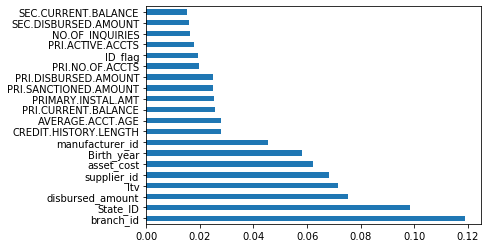

In [52]:
#Here we depict a plot representing which features are important
#We have taken the number as 20 so it represents 20 most important features for classification
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X_train,y_train)

print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=X_train_df.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# KNN Classifier

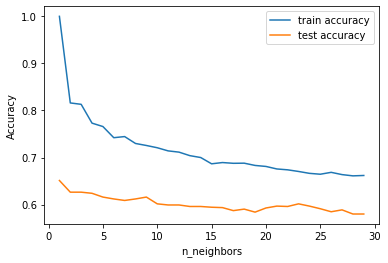

In [53]:
#Here we are using KNN Classifier for the model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
train_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 30
neighbors = range(1, 30)

for n_neighbors in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(neighbors, train_accuracy, label="train accuracy")
plt.plot(neighbors, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

#### By plotting we feel that the best value for n_neighbors lies between 12 to 20

In [54]:
#Instantiate and fit the classifier
for i in range (12,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    #Predict on test dataset
    #Check train and test accuracy
    print("When k = ", i)
    print("Test set predictions: {}".format(knn.predict(X_test)))
    print("Train set accuracy: {:.2f}".format(knn.score(X_train, y_train)))
    print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

When k =  12
Test set predictions: [0 0 0 ... 0 1 0]
Train set accuracy: 0.71
Test set accuracy: 0.60
When k =  13
Test set predictions: [0 0 1 ... 0 1 0]
Train set accuracy: 0.70
Test set accuracy: 0.60
When k =  14
Test set predictions: [0 0 1 ... 0 1 0]
Train set accuracy: 0.70
Test set accuracy: 0.60
When k =  15
Test set predictions: [0 0 1 ... 1 1 0]
Train set accuracy: 0.69
Test set accuracy: 0.59
When k =  16
Test set predictions: [0 0 1 ... 1 1 0]
Train set accuracy: 0.69
Test set accuracy: 0.59
When k =  17
Test set predictions: [0 0 1 ... 1 1 0]
Train set accuracy: 0.69
Test set accuracy: 0.59
When k =  18
Test set predictions: [0 0 1 ... 0 1 0]
Train set accuracy: 0.69
Test set accuracy: 0.59
When k =  19
Test set predictions: [0 0 1 ... 0 1 0]
Train set accuracy: 0.68
Test set accuracy: 0.58


# Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
#Here we are checking for varying C values which one works the best for the model by plotting it
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = c, max_iter = 1000)
    log_l2 = LogisticRegression(penalty = 'l2', C = c, max_iter = 1000)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

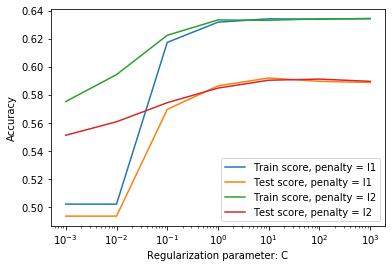

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

#### By plotting we feel that the best value for C is 0.1

### Using L1 penalty

In [58]:
logit = LogisticRegression(solver='liblinear', C=0.1, max_iter=1000, penalty = 'l1' )
logit.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
print("Train set accuracy: {:.2f}".format(logit.score(X_train, y_train)))
print("Test set accuracy: {:.2f}".format(logit.score(X_test, y_test)))

Train set accuracy: 0.62
Test set accuracy: 0.57


In [60]:
print(classification_report(y_test,logit.predict(X_test)))

              precision    recall  f1-score   support

           0       0.57      0.54      0.55       617
           1       0.57      0.60      0.59       633

    accuracy                           0.57      1250
   macro avg       0.57      0.57      0.57      1250
weighted avg       0.57      0.57      0.57      1250



In [61]:
confusion = confusion_matrix(y_test, logit.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[332 285]
 [253 380]]


### Using L2 penalty

In [62]:
logitL2 = LogisticRegression(solver='liblinear', C=0.1, max_iter=1000, penalty = 'l2' )
logitL2.fit(X_train, y_train)
print("Train set accuracy: {:.2f}".format(logitL2.score(X_train, y_train)))
print("Test set accuracy: {:.2f}".format(logitL2.score(X_test, y_test)))

Train set accuracy: 0.62
Test set accuracy: 0.57


In [63]:
print(classification_report(y_test,logitL2.predict(X_test)))
confusion = confusion_matrix(y_test, logitL2.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))

              precision    recall  f1-score   support

           0       0.57      0.55      0.56       617
           1       0.57      0.59      0.58       633

    accuracy                           0.57      1250
   macro avg       0.57      0.57      0.57      1250
weighted avg       0.57      0.57      0.57      1250

Confusion matrix:
[[337 280]
 [259 374]]


# LinearSVC and SVM

In [64]:
from sklearn.svm import SVC, LinearSVC
from sklearn import metrics

In [65]:
train_l1 = []
test_l1 = []

for C in [0.01, 0.1, 1, 10, 100]:
    linear = LinearSVC(C = C, max_iter = 100000)
    linear.fit(X_train, y_train)
    
    train_l1.append(linear.score(X_train, y_train))
    test_l1.append(linear.score(X_test, y_test))

([<matplotlib.axis.XTick at 0x280cf44da48>,
 <a list of 5 Text xticklabel objects>)

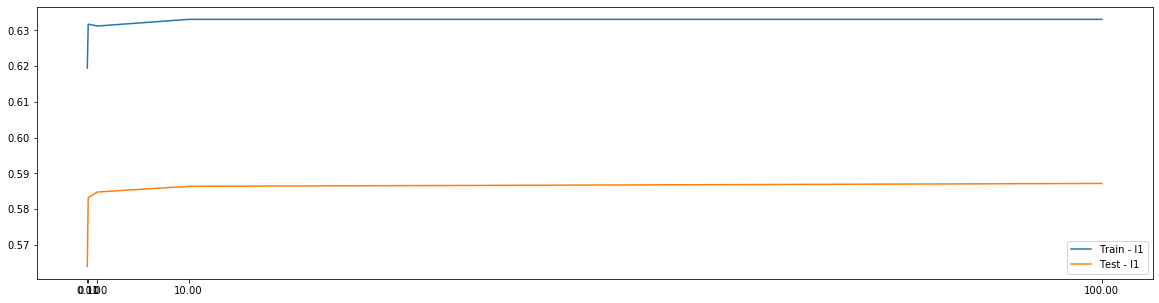

In [66]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot([0.01, 0.1, 1, 10, 100], train_l1, label = 'Train - l1')
plt.plot([0.01, 0.1, 1, 10, 100], test_l1, label = 'Test - l1')

plt.legend()
plt.xticks([0.01, 0.1, 1, 10, 100])

#### By plotting we feel that the best value for C is 1

In [67]:
linear = LinearSVC(C = 1, max_iter = 10000)
linear.fit(X_train, y_train)
print("Test set predictions: {}".format(linear.predict(X_test)))
print("Train set accuracy: {:.2f}".format(linear.score(X_train, y_train)))
print("Test set accuracy: {:.2f}".format(linear.score(X_test, y_test)))
print("Accuracy:",metrics.accuracy_score(y_test, linear.predict(X_test)))

Test set predictions: [0 1 0 ... 0 1 0]
Train set accuracy: 0.63
Test set accuracy: 0.58
Accuracy: 0.5848


# SVM

### Linear kernel SVM

In [68]:
from sklearn.model_selection import GridSearchCV 
  
linear_svm_grid = {'C': [0.01, 0.1, 1, 10],  
              'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
gridlinear = GridSearchCV(SVC(), linear_svm_grid, refit = True, verbose = 3) 
  
gridlinear.fit(X_train, y_train) 

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=0.01, gamma=10, kernel=linear .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... C=0.01, gamma=10, kernel=linear, score=0.555, total=   1.0s
[CV] C=0.01, gamma=10, kernel=linear .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ..... C=0.01, gamma=10, kernel=linear, score=0.604, total=   1.0s
[CV] C=0.01, gamma=10, kernel=linear .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV] ..... C=0.01, gamma=10, kernel=linear, score=0.564, total=   1.0s
[CV] C=0.01, gamma=10, kernel=linear .................................
[CV] ..... C=0.01, gamma=10, kernel=linear, score=0.535, total=   1.0s
[CV] C=0.01, gamma=10, kernel=linear .................................
[CV] ..... C=0.01, gamma=10, kernel=linear, score=0.571, total=   1.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.555, total=   1.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.604, total=   1.1s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.564, total=   1.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.535, total=   1.1s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  2.1min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [69]:
print("Best parameters: {}".format(gridlinear.best_params_))

Best parameters: {'C': 10, 'gamma': 10, 'kernel': 'linear'}


In [70]:
SVMlinear = SVC(C = gridlinear.best_params_['C'] , gamma = gridlinear.best_params_['gamma'] , kernel='linear')
SVMlinear.fit(X_train, y_train)
print("Test set predictions: {}".format(SVMlinear.predict(X_test)))
print('Train score: ', SVMlinear.score(X_train, y_train))
print('Test score: ', SVMlinear.score(X_test, y_test))

Test set predictions: [0 1 0 ... 0 1 0]
Train score:  0.6298666666666667
Test score:  0.58


### RBF kernel SVM

In [71]:
param_grid = {'C': [0.01, 0.1, 1, 10],  
              'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
gridrbf = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
gridrbf.fit(X_train, y_train) 

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=0.01, gamma=10, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........ C=0.01, gamma=10, kernel=rbf, score=0.503, total=   1.5s
[CV] C=0.01, gamma=10, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] ........ C=0.01, gamma=10, kernel=rbf, score=0.503, total=   1.5s
[CV] C=0.01, gamma=10, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


[CV] ........ C=0.01, gamma=10, kernel=rbf, score=0.503, total=   1.5s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ........ C=0.01, gamma=10, kernel=rbf, score=0.501, total=   1.5s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ........ C=0.01, gamma=10, kernel=rbf, score=0.501, total=   1.5s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.544, total=   1.5s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.521, total=   1.5s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.524, total=   1.6s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.553, total=   1.5s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  3.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [72]:
rbf = SVC(C = 0.1, gamma = 0.1, kernel='rbf')
rbf.fit(X_train, y_train)
print("Test set predictions: {}".format(rbf.predict(X_test)))
print('Train score: ', rbf.score(X_train, y_train))
print('Test score: ', rbf.score(X_test, y_test))

Test set predictions: [0 1 0 ... 0 1 0]
Train score:  0.5957333333333333
Test score:  0.5632


### Poly kernel SVM

In [73]:
poly = SVC(C = 10, gamma = 0.1, kernel='poly')
poly.fit(X_train, y_train)
print("Test set predictions: {}".format(poly.predict(X_test)))
print('Train score: ', poly.score(X_train, y_train))
print('Test score: ', poly.score(X_test, y_test))

Test set predictions: [0 1 0 ... 0 1 0]
Train score:  0.6845333333333333
Test score:  0.624


# Decision Tree Classifier

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
param_grid = {'max_depth': [3,7,10,15],
              'min_samples_leaf':[3,7,10,18,23],
              'criterion' : ['gini', 'entropy']}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'max_depth': [3, 7, 10, 15], 'min_samples_leaf': [3, 7, 10, 18, 23], 'criterion': ['gini', 'entropy']}


In [75]:
dt= DecisionTreeClassifier()
grid_search_dt = GridSearchCV(dt, param_grid)
grid_search_dt.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_dt.best_params_))

Best parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 7}


In [76]:
dt = DecisionTreeClassifier(max_depth= grid_search_dt.best_params_['max_depth'], criterion=grid_search_dt.best_params_['criterion'], min_samples_leaf = grid_search_dt.best_params_['min_samples_leaf'])
dt.fit(X_train, y_train)
dt.predict(X_test)
print('Train score: ', dt.score(X_train, y_train))
print('Test score: ', dt.score(X_test, y_test))

Train score:  0.8162666666666667
Test score:  0.8048


### Decision tree only using Gini criterion and no other restrictions

In [77]:
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(X_train, y_train)
dt.predict(X_test)
print('Train score: ', dt.score(X_train, y_train))
print('Test score: ', dt.score(X_test, y_test))

Train score:  1.0
Test score:  0.764


### Decision tree only using Entropy criterion and no other restrictions

In [78]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)
dt.predict(X_test)
print('Train score: ', dt.score(X_train, y_train))
print('Test score: ', dt.score(X_test, y_test))

Train score:  1.0
Test score:  0.7616


#### As expected when no additional criteria is put on, the train data sets have perfect accuracy of 1 but then it does not perform that well on test dataset giving rise to overfitting

# Naive Bayes Classifier

In [79]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()

In [80]:
naive.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [81]:
naive.predict(X_test)

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [82]:
print("Train set accuracy: {:.2f}".format(naive.score(X_train, y_train)))
print("Test set accuracy: {:.2f}".format(naive.score(X_test, y_test)))

Train set accuracy: 0.53
Test set accuracy: 0.52


# Applying PCA

In [83]:
from sklearn.decomposition import PCA

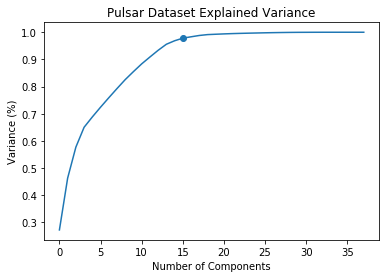

In [84]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(X_train)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.scatter(15,.98)
plt.show()

#### This plot tells us that selecting 15 components we can preserve something around 98% of the total variance of the data. We can now check with using only the principal components if the accuracy improves for our model.

In [85]:
pca = PCA(n_components=15)
train_PCA = pca.fit_transform(X_train)
test_PCA =  pca.transform(X_test)

In [86]:
train_PCA.shape

(3750, 15)

# KNN using PCA

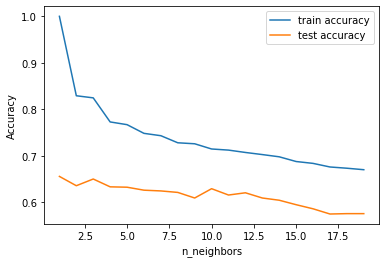

In [87]:
from sklearn.neighbors import KNeighborsClassifier
#Here we are using KNN Classifier for the model
train_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 30
neighbors = range(1,20)

for n_neighbors in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(train_PCA, y_train)
    train_accuracy.append(knn.score(train_PCA, y_train))
    test_accuracy.append(knn.score(test_PCA, y_test))
    
plt.plot(neighbors, train_accuracy, label="train accuracy")
plt.plot(neighbors, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

#### The value of n_neighbors most appropriate lies between 10 to 17

In [88]:
#Instantiate and fit the classifier
for i in range (10,17):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_PCA, y_train)
    print("When k = ", i)
    print("Test set predictions: {}".format(knn.predict(test_PCA)))
    print("Train set accuracy: {:.2f}".format(knn.score(train_PCA, y_train)))
    print("Test set accuracy: {:.2f}".format(knn.score(test_PCA, y_test)))

When k =  10
Test set predictions: [0 0 0 ... 0 0 0]
Train set accuracy: 0.71
Test set accuracy: 0.63
When k =  11
Test set predictions: [0 0 1 ... 0 0 0]
Train set accuracy: 0.71
Test set accuracy: 0.62
When k =  12
Test set predictions: [0 0 1 ... 0 0 0]
Train set accuracy: 0.71
Test set accuracy: 0.62
When k =  13
Test set predictions: [0 0 1 ... 1 0 0]
Train set accuracy: 0.70
Test set accuracy: 0.61
When k =  14
Test set predictions: [0 0 1 ... 1 0 0]
Train set accuracy: 0.70
Test set accuracy: 0.60
When k =  15
Test set predictions: [0 0 1 ... 1 0 0]
Train set accuracy: 0.69
Test set accuracy: 0.60
When k =  16
Test set predictions: [0 0 1 ... 1 0 0]
Train set accuracy: 0.68
Test set accuracy: 0.59


# Logistic Regression using PCA

In [89]:
logis_PCA_grid = {'C':[0.001, 0.01, 0.1,1, 10], 'penalty':['l1','l2'] }
grid_search_logis = GridSearchCV(LogisticRegression(), logis_PCA_grid)

grid_search_logis.fit(train_PCA, y_train)
print("Best parameters: {}".format(grid_search_logis.best_params_))

c:\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
c:\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
c:\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
c:\python\python37\lib\site-packages\sklearn\model_selection\

Best parameters: {'C': 1, 'penalty': 'l2'}


In [90]:
logit = LogisticRegression(C=1, max_iter=1000, penalty = 'l2' )
logit.fit(train_PCA, y_train)
print("Train set accuracy: {:.2f}".format(logit.score(train_PCA, y_train)))
print("Test set accuracy: {:.2f}".format(logit.score(test_PCA, y_test)))

Train set accuracy: 0.62
Test set accuracy: 0.57


In [91]:
print(classification_report(y_test,logit.predict(test_PCA)))
confusion = confusion_matrix(y_test, logit.predict(test_PCA))
print("Confusion matrix:\n{}".format(confusion))

              precision    recall  f1-score   support

           0       0.57      0.53      0.55       617
           1       0.57      0.60      0.59       633

    accuracy                           0.57      1250
   macro avg       0.57      0.57      0.57      1250
weighted avg       0.57      0.57      0.57      1250

Confusion matrix:
[[330 287]
 [251 382]]


# SVM using PCA

### Linear kernel using PCA

In [92]:
linear_svm_grid = {'C': [0.01, 0.1, 1, 10],  
              'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
gridlinear = GridSearchCV(SVC(), linear_svm_grid, refit = True, verbose = 3) 
  
gridlinear.fit(train_PCA, y_train)
print("Best parameters: {}".format(gridlinear.best_params_))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=0.01, gamma=10, kernel=linear .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... C=0.01, gamma=10, kernel=linear, score=0.553, total=   0.4s
[CV] C=0.01, gamma=10, kernel=linear .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ..... C=0.01, gamma=10, kernel=linear, score=0.595, total=   0.4s
[CV] C=0.01, gamma=10, kernel=linear .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] ..... C=0.01, gamma=10, kernel=linear, score=0.568, total=   0.5s
[CV] C=0.01, gamma=10, kernel=linear .................................
[CV] ..... C=0.01, gamma=10, kernel=linear, score=0.535, total=   0.5s
[CV] C=0.01, gamma=10, kernel=linear .................................
[CV] ..... C=0.01, gamma=10, kernel=linear, score=0.569, total=   0.5s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.553, total=   0.4s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.595, total=   0.4s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.568, total=   0.4s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.535, total=   0.4s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.0min finished


Best parameters: {'C': 1, 'gamma': 10, 'kernel': 'linear'}


In [93]:
SVMlinear = SVC(C = gridlinear.best_params_['C'], gamma = gridlinear.best_params_['gamma'], kernel='linear')
SVMlinear.fit(train_PCA, y_train)
print("Test set predictions: {}".format(SVMlinear.predict(test_PCA)))
print('Train score: ', SVMlinear.score(train_PCA, y_train))
print('Test score: ', SVMlinear.score(test_PCA, y_test))

Test set predictions: [0 1 1 ... 0 1 0]
Train score:  0.6146666666666667
Test score:  0.5672


### RBF kernel using PCA

In [94]:
param_grid = {'C': [0.01, 0.1, 1, 10],  
              'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
gridrbf = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
gridrbf.fit(train_PCA, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=0.01, gamma=10, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........ C=0.01, gamma=10, kernel=rbf, score=0.503, total=   0.9s
[CV] C=0.01, gamma=10, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ........ C=0.01, gamma=10, kernel=rbf, score=0.503, total=   0.7s
[CV] C=0.01, gamma=10, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] ........ C=0.01, gamma=10, kernel=rbf, score=0.503, total=   0.8s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ........ C=0.01, gamma=10, kernel=rbf, score=0.501, total=   0.9s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ........ C=0.01, gamma=10, kernel=rbf, score=0.501, total=   0.9s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.544, total=   0.9s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.561, total=   0.9s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.529, total=   0.9s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.547, total=   0.9s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.8min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [95]:
rbf = SVC(C = 10, gamma = 0.1, kernel='rbf')
rbf.fit(train_PCA, y_train)
print("Test set predictions: {}".format(rbf.predict(test_PCA)))
print('Train score: ', rbf.score(train_PCA, y_train))
print('Test score: ', rbf.score(test_PCA, y_test))

Test set predictions: [0 1 1 ... 0 1 0]
Train score:  0.6864
Test score:  0.6368


### Poly kernel using PCA

In [96]:
poly = SVC(C = 1, gamma = 1, kernel='poly')
poly.fit(train_PCA, y_train)
print("Test set predictions: {}".format(poly.predict(test_PCA)))
print('Train score: ', poly.score(train_PCA, y_train))
print('Test score: ', poly.score(test_PCA, y_test))

Test set predictions: [0 1 0 ... 0 1 0]
Train score:  0.7189333333333333
Test score:  0.6264


# Decision Tree using PCA

#### Here we are implementing Decision Tree with PCA to see if the model accuracy improves. First we are considering Gini as criterion and then Entropy as the criterion

### Criterion : Gini

In [97]:
from sklearn.tree import DecisionTreeClassifier
gini_grid = {'max_depth': [3,5,7,10,13,15],
              'min_samples_leaf':[3,5,7,10,13,18,23],
              'criterion' : ['gini']}
print("Parameter grid:\n{}".format(gini_grid))

Parameter grid:
{'max_depth': [3, 5, 7, 10, 13, 15], 'min_samples_leaf': [3, 5, 7, 10, 13, 18, 23], 'criterion': ['gini']}


In [98]:
dt= DecisionTreeClassifier()
ginigrid_search = GridSearchCV(dt, gini_grid)
ginigrid_search.fit(train_PCA, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini'],
                         'm

In [99]:
dt = DecisionTreeClassifier(max_depth= 2, criterion=ginigrid_search.best_params_['criterion'], min_samples_leaf = ginigrid_search.best_params_['min_samples_leaf'])
dt.fit(train_PCA, y_train)
dt.predict(test_PCA)
print('Train score: ', dt.score(train_PCA, y_train))
print('Test score: ', dt.score(test_PCA, y_test))

Train score:  0.6128
Test score:  0.6136


### Criterion : Entropy

In [100]:
entropy_grid = {'max_depth': [3,7,10,15],
              'min_samples_leaf':[3,7,10,18,23],
              'criterion' : ['entropy']}
print("Parameter grid:\n{}".format(entropy_grid))

Parameter grid:
{'max_depth': [3, 7, 10, 15], 'min_samples_leaf': [3, 7, 10, 18, 23], 'criterion': ['entropy']}


In [101]:
dtree= DecisionTreeClassifier()
entropygrid_search = GridSearchCV(dtree, entropy_grid)
entropygrid_search.fit(train_PCA, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy'], 'max_depth': [3, 7, 10, 

In [102]:
dtree = DecisionTreeClassifier(max_depth= 4, min_samples_leaf = 7 , criterion='entropy')
dtree.fit(train_PCA, y_train)
dtree.predict(test_PCA)
print('Train score: ', dtree.score(train_PCA, y_train))
print('Test score: ', dtree.score(test_PCA, y_test))

Train score:  0.6370666666666667
Test score:  0.6144


### By comparing all the models we see that the best accuracy for the model is given by Decision Tree without using the PCA components.Hence we can say that the decision tree model best exhibits the features of this dataset

### PCA does not improve the model accuracy much. So we can con exclude the PCA components